In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
from datetime import datetime as dt
from datetime import date
today = dt.now()
today

datetime.datetime(2020, 4, 17, 20, 7, 20, 169102)

In [56]:
date.today()

datetime.date(2020, 4, 17)

In [57]:
date = pd.to_datetime()

TypeError: to_datetime() missing 1 required positional argument: 'arg'

# Seaborn

In [15]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
# xóa columns: popData2018 và countryterritoryCode
df.drop(columns=['popData2018', 'countryterritoryCode'], inplace = True)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId
0,2020-04-16,16,4,2020,70,2,Afghanistan,AF
1,2020-04-15,15,4,2020,49,2,Afghanistan,AF
2,2020-04-14,14,4,2020,58,3,Afghanistan,AF
3,2020-04-13,13,4,2020,52,0,Afghanistan,AF
4,2020-04-12,12,4,2020,34,3,Afghanistan,AF


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11152 entries, 0 to 11151
Data columns (total 8 columns):
dateRep                    11152 non-null datetime64[ns]
day                        11152 non-null int8
month                      11152 non-null int8
year                       11152 non-null int16
cases                      11152 non-null int32
deaths                     11152 non-null int32
countriesAndTerritories    11152 non-null object
geoId                      11119 non-null object
dtypes: datetime64[ns](1), int16(1), int32(2), int8(2), object(2)
memory usage: 392.2+ KB


In [19]:
df[['day', 'month']] = df[['day', 'month']].astype('int8')

In [21]:
df[['year']] = df[['year']].astype('int16')

In [26]:
df[['cases', 'deaths']] = df[['cases', 'deaths']].astype('int32')

In [37]:
#tuần vừa qua, thế giới có bao nhiêu ca nhiễm
df1 = df[['dateRep', 'cases']][('2020-04-05' <= df.dateRep)  & (df.dateRep <= '2020-04-11')]
df1.groupby('dateRep').sum()

,cases
dateRep,
2020-04-05,86713
2020-04-06,71232
2020-04-07,71390
2020-04-08,74902
2020-04-09,84930
2020-04-10,87039
2020-04-11,89349


In [62]:
current_week = pd.to_datetime(datetime.now()).weekofyear
df['weekofyear'] = df.dateRep.dt.weekofyear
df[df.weekofyear == current_week].cases.sum()
#df.dateRep.dt.weekofyear

295017

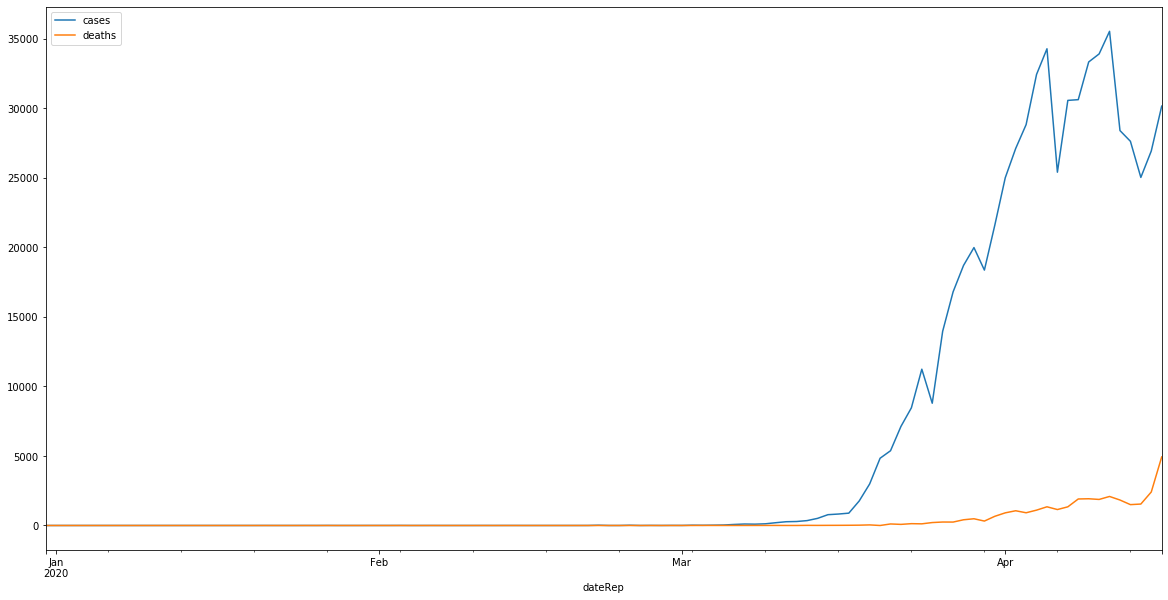

In [64]:
df_us = df[df.geoId == 'US']
df_us[['dateRep', 'cases', 'deaths']].set_index('dateRep').plot(figsize = (20, 10))
#plt.xlablel('Month')

Text(0.5, 0, 'Week of year')

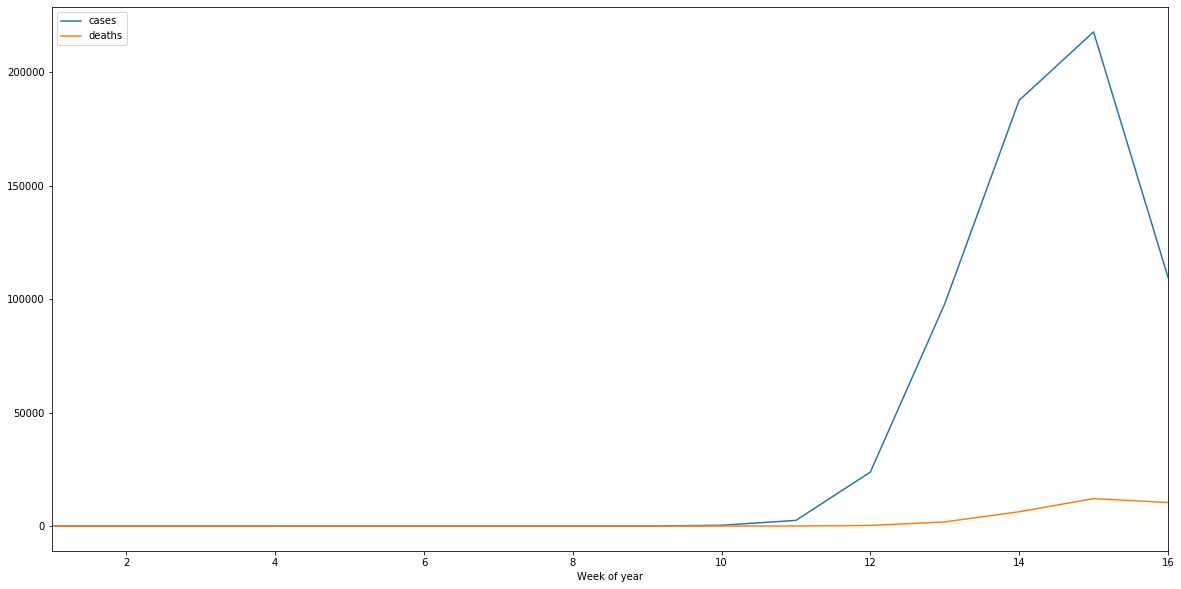

In [68]:
df_us[['weekofyear', 'cases', 'deaths']].groupby('weekofyear').sum().plot(figsize = (20, 10))
plt.xlabel('Week of year')

In [ ]:
df_us['cumsum_cases'] = df_us.loc[::-1, 'cases'].sumsum()

In [79]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
country      243 non-null object
latitude     244 non-null float64
longitude    244 non-null float64
name         244 non-null object
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [80]:
import folium
m = folium.Map(location=[48, -102], zoom_start = 3)
for lat, lng, add in zip(df_countries.latitude, df_countries.longitude, df_countries.name):
    folium.Marker([lat, lng], popup=add).add_to(m)
m    

In [72]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [82]:
locations = df_countries[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)

244

In [83]:
map = folium.Map(location=[38.9, -77.05], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df_countries['country'][point]).add_to(map)
map

In [84]:
import folium
m = folium.Map(location=[48, -102], zoom_start = 3)
for lat, lng, add in zip(df_countries.latitude, df_countries.longitude, df_countries.name):
    folium.Marker([lat, lng], popup=add).add_to(m)
m    

In [94]:
#df_countries; df
df_covid = df[['geoId', 'cases', 'deaths']].groupby('geoId').sum()
df_covid = pd.merge(df['geoId'] , df_covid, on = 'geoId' ).drop_duplicates()


df_covid = df_covid.set_index('geoId')
#df_covid


,cases,deaths
geoId,,
AF,784,25
AL,494,25
DZ,2160,336
AD,673,33
AO,19,2
...,...,...
VE,197,9
VN,275,0
YE,1,0


In [86]:
#df_countries['cases'] = 